# Simple LUME-Genesis example

In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from genesis import Genesis
import numpy as np
import os

# Genesis binary
if 'GENESIS_BIN' not in os.environ:
    os.environ['GENESIS_BIN'] = os.path.expandvars('$HOME/Code/genesis/bin/genesis')

In [3]:
# Make genesis object with default input
G = Genesis('data/basic/genesis.in', verbose=True)
G.path

loading lattice:  /Users/chrisonian/Code/GitHub/lume-genesis/examples/data/basic/genesis_lattice.in
Configured to run in: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6


'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6'

In [4]:
# Turn on field output
G['idmpfld'] = 1
# Turn on particle output
G['idmppar'] = 1
G['npart'] = 2048

# Turn on history
G['ippart'] = 10
G['ipradi'] = 0
G['ncar']

print(G)

Genesis configured in /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6


In [5]:
# Run genesis with default lattice 
G.run()

init dir:  /Users/chrisonian/Code/GitHub/lume-genesis/examples
Running genesis in /private/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6
/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6 genesis_lattice.in
Lattice written: /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6/genesis_lattice.in
-------------------------------
Genesis 1.3 has begun execution
(Version 1.0 Unix)

Please enter input file name 
***  Warning: Size of particle file [Mbytes]:  14     
Slice     1: Simulation  10% completed.
Slice     1: Simulation  20% completed.
Slice     1: Simulation  30% completed.
Slice     1: Simulation  40% completed.
Slice     1: Simulation  50% completed.
Slice     1: Simulation  60% completed.
Slice     1: Simulation  70% completed.
Slice     1: Simulation  80% completed.
Slice     1: Simulation  90% completed.
Slice     1: Simulation 100% completed.
***  writing history record for slice     1
***  closing files

Genesis run has finished
--------------

In [6]:
# This is the working path
G.path

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6'

In [7]:
# Contents of this
!ls -ahl {G.path}

total 34920
drwx------   10 chrisonian  staff   320B May 11 21:11 .
drwx------@ 172 chrisonian  staff   5.4K May 11 21:11 ..
-rw-r--r--    1 chrisonian  staff   2.2K May 11 21:11 genesis.in
-rw-r--r--    1 chrisonian  staff   370K May 11 21:11 genesis.out
-rw-r--r--    1 chrisonian  staff   984K May 11 21:11 genesis.out.dfl
-rw-r--r--    1 chrisonian  staff    96K May 11 21:11 genesis.out.dpa
-rw-r--r--    1 chrisonian  staff    15M May 11 21:11 genesis.out.par
-rw-r--r--    1 chrisonian  staff   1.3K May 11 21:11 genesis_lattice.in
-rw-r--r--    1 chrisonian  staff   1.3K May 11 21:11 genesis_lattice.out
-rwxr-xr-x    1 chrisonian  staff    53B May 11 21:11 run


In [8]:
# Get a hash of the input
G.fingerprint()

'ac527a9a7ba0aa9d23cc0977b9eb4d59'

In [9]:
# Loads the lattice file. Note that this has already been done on init. 
G.load_lattice()

loading lattice:  /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6/genesis_lattice.in


In [10]:
# Lattice parameters
G.lattice['param']

{'version': 1, 'unitlength': 0.03}

In [11]:
# Get a list of z from the output
G.output.keys()

dict_keys(['run_info', 'param', 'data'])

In [12]:
# These are the available data
G.output['data'].keys()

dict_keys(['z', 'aw', 'qfld', 'index', 'current', 'power', 'increment', 'p_mid', 'phi_mid', 'r_size', 'energy', 'bunching', 'xrms', 'yrms', 'error', '<x>', '<y>', 'e-spread', 'far_field'])

In [13]:
zlist = G.output['data']['z']
zlist.shape

(1561,)

In [14]:
# Get power. This is a 2d array of: slice, z
power = G.output['data']['power']
power.shape

(1, 1561)

In [15]:
# Test Bokeh plotting
from bokeh.plotting import figure, output_file, show, output_notebook

#output_file("line.html")
output_notebook(verbose=False, hide_banner=True)

p = figure(plot_width=800, plot_height=400, y_axis_type='log')

# add a line renderer
p.line(zlist, power[0], line_width=2)

p.xaxis.axis_label = 'Z (M)'
p.yaxis.axis_label = 'power (W)'

show(p)

# Archiving

In [16]:
afile = G.archive()

Archiving to file genesis_5d106a6b69ac6e4c13dfb7b051d656c8.h5


In [17]:
G2 = Genesis()
G2.load_archive(afile)

In [18]:
# Check that fingetprints (hash on input) are the same
G.fingerprint() == G2.fingerprint()

True

In [19]:
# Check that all output data are the same
for k in G.output['data']:
    print(k, np.all(G.output['data'][k]==G2.output['data'][k]))

z True
aw True
qfld True
index True
current True
power True
increment True
p_mid True
phi_mid True
r_size True
energy True
bunching True
xrms True
yrms True
error True
<x> True
<y> True
e-spread True
far_field True


# Particle file

In [20]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,8]
import numpy as np
import os
import time

In [21]:
fname = G.path+'/genesis.out.par'
fname

'/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp29bfayg6/genesis.out.par'

In [22]:
pdat = np.fromfile(fname, dtype=np.float).astype(float)
npart = G['npart']
nbunch = int(len(pdat)/6/npart)
nbunch

157

In [23]:
# gamma, phase, x, y, px/mc, py/mc
b = pdat.reshape(nbunch,6,npart)

In [24]:
len(b[0][2])

2048

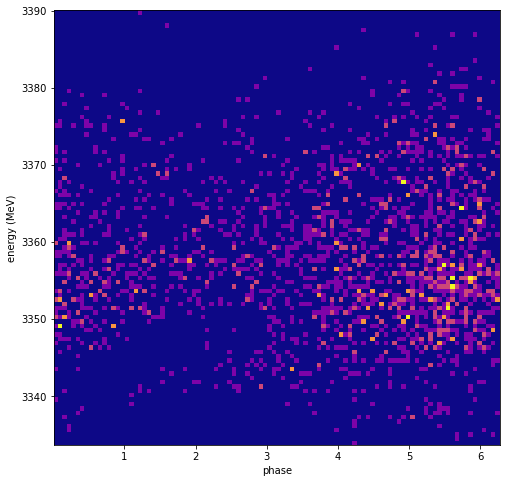

In [25]:
p = b[-1]
plt.hist2d(p[1]% (2*np.pi), 0.511*p[0], bins=[100,100], cmap=plt.get_cmap('plasma'))
plt.xlabel('phase')
plt.ylabel('energy (MeV)')
plt.savefig('frame.png')
plt.show()

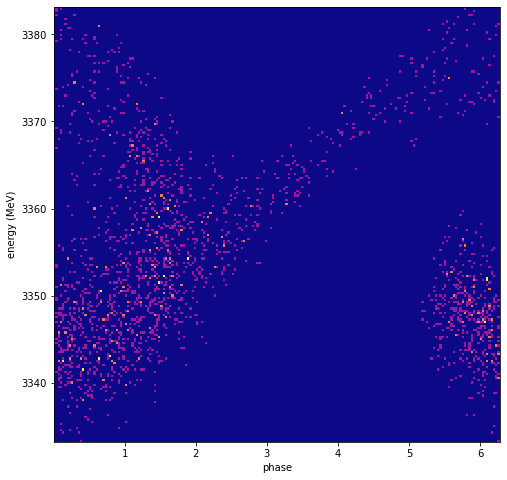

In [26]:
def frame(i, ):
    p = b[i]
    plt.hist2d(p[1]% (2*np.pi), 0.511*p[0], bins=[200,200], cmap=plt.get_cmap('plasma'))
    plt.xlabel('phase')
    plt.ylabel('energy (MeV)')
    plt.savefig('frame_'+str(i)+'.png')
    
frame(100)

In [27]:
# Make frames
#for i in range(nbunch):
#    frame(i);

In [28]:
# Make movie
#!ffmpeg -framerate 10 -i frame_%d.png -c:v libx264 -c:a libfdk_aac output.mp4